# Stratified Target Split Matters

Before starting the modeling process, let’s split our data. However, I’ll take this opportunity to demonstrate how I split data when the target variable is continuous.

When splitting, we want the test sample to be isolated yet a similar representation of our training data. It’s important to ensure that both datasets have similar distributions. While we can look for similarities in features, I prefer to focus on the target variable since it’s the core of our study and what we’ll analyze and predict. Since the core of machine learning is to attribute any changes in the target to changes in the features, it's crucial to ensure that the target is similarly distributed in both the test and training datasets.

Let’s take a look at how the data looks before and after splitting, and see how to properly handle this.


1. **Stratified** Split: Ensures the distribution of the *continuos* target variable (charges) is similar in both train and test sets.
2. **Non-Stratified** Split: Splits the data randomly, which might lead to different distributions in the two sets.

### Step 1: Importing Libraries and Loading Data



In [6]:
import pandas as pd
import kagglehub

import helper_plot_functions as hpf
import helper_model_functions as hmf
import importlib

from sklearn.model_selection import train_test_split

try:
    importlib.reload(hpf)
    importlib.reload(hmf)
except Exception as e: 
    print(f'Error reloading module: {e}')
    
    
# Download data from KaggleHub 
path = kagglehub.dataset_download("mirichoi0218/insurance")
df = pd.read_csv(path + "/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 2: Stratified Split of the Data

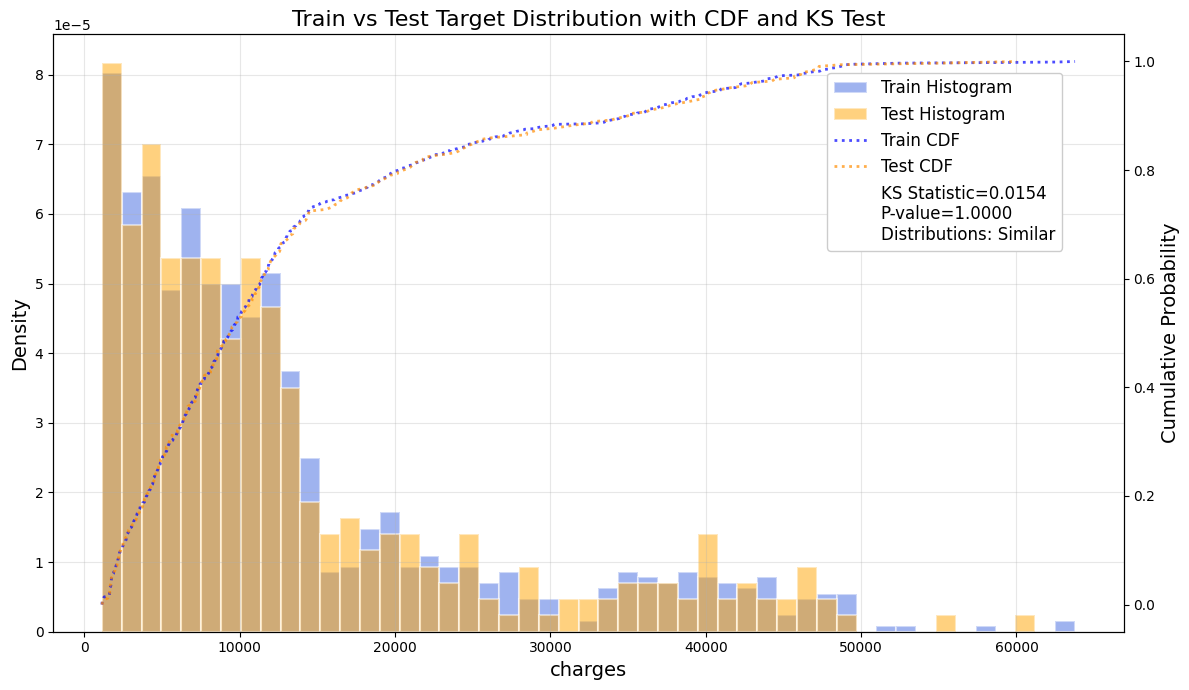

In [7]:
#get stratified split of data
hmf.stratified_split_csv(df, target_column='charges', 
                         output_train_csv='data/train.csv', output_test_csv='data/test.csv',
                         test_size=.25, random_state=117, n_bins=40)

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

hpf.target_comparison_plot(train,test,target_column='charges')

**Explanation:**

- The `stratified_split_csv` function from `helper_model_functions` ensures that the training and test sets are stratified based on the charges target variable. I use 40 bins to achieve a more accurate stratification (increasing the bin count can improve the similarity).
- The `target_comparison_plot` visualizes the target distributions from both the training and testing sets.
- Kolmogorov-Smirnov test results are displayed to measure the similarity between the distributions.


### Step 3: Non-Stratified Split of the Data

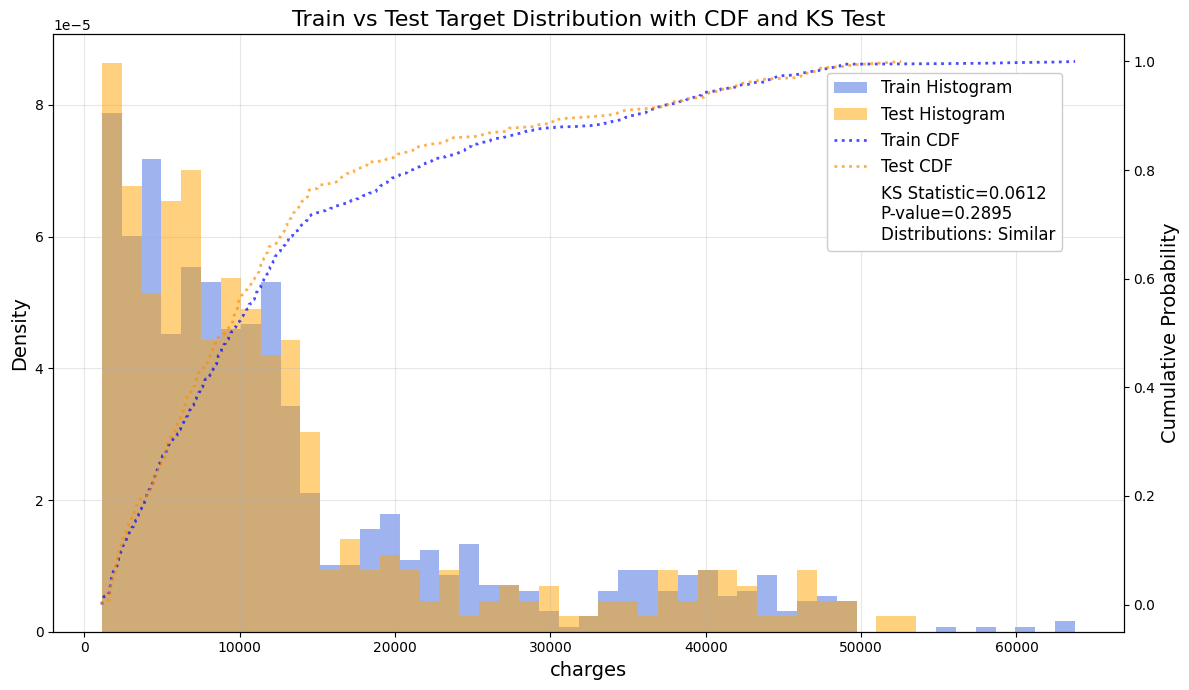

In [3]:
#get no stratify example 
target_column = 'charges'
X = df.drop(columns=[target_column]) 
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=117)
train_no_stratify = pd.concat([X_train, y_train], axis=1)
test_no_stratify = pd.concat([X_test, y_test], axis=1)

hpf.target_comparison_plot(train_no_stratify,test_no_stratify,target_column='charges')

### Results

**stratified splitting works better**. 
With a KS statistic of 0.0154 and a p-value of 1.0, the target distributions in the train and test sets are very similar. 

Meanwhile, the non-stratified split (KS = 0.0612, p-value = 0.28) still isn’t terrible, but there's a noticeable difference. While non-stratified splits aren’t bad, stratification keeps things more balanced and ensures your model sees similar data in both sets, leading to more reliable results.